In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import math
from cycler import cycler
from matplotlib.pyplot import cm
import csv

#routine to load in data from csv file
def loaddata(filename):
     with open(filename, newline='') as csvfile:
        rawdata = csv.reader(csvfile, delimiter=',')
        count = 0
        for row in rawdata:
            if(count < 1):
                headers = row
            elif(count == 1):
                data = np.array(row, dtype=float)
            else:
                data2 = np.array(row, dtype=float)
                data = np.vstack([data,data2])
            count = count + 1

        return headers, data
    
def trainglephasediagram(plotsize, pixelsize, axs, data, maxT, minT, maxP, minP, colourmap):
    ## 2. define number of triangles and dimensions
    noPh = data.shape[1] - 2    #number of phases (-2 to remove T and P columns)
    noPo = data.shape[0]        #number of points
    
    #diameter of points
    x_di = (maxT-minT)/(plotsize[0]*100)*pixelsize
    y_di = (maxP-minP)/(plotsize[1]*100)*pixelsize
    
    ## 3. plot triangles
    theta = (2*math.pi)/noPh   #calcualtes the angle change based on the number of phases
    
    #set up colour options
    colour = eval("iter(cm." + colourmap + "(np.linspace(0, 1, noPh)))")
    c = next(colour)
    for i in range(1,noPh):
        color = next(colour)
        c = np.vstack([c,color])
        
    for j in range(0,noPo):
        centre = data[j,:2]
        for i in range(0,noPh): 
            angle1 = theta * i  #first point coordinates of traingle
            x1 = x_di/2 * math.cos(angle1) + centre[0]
            y1 = y_di/2 * math.sin(angle1) + centre[1]
            
            angle2 = theta*(i+1)   #second point of traingle
            x2 = x_di/2 * math.cos(angle2) + centre[0]
            y2 = y_di/2 * math.sin(angle2) + centre[1]
            
            p1 = np.zeros([4,2])  #set up array with all points of traingle    
            p1[0,:] = centre
            p1[1,:] = [x1,y1]
            p1[2,:] = [x2,y2]
            p1[3,:] = centre
    
            if(data[j,i+2] == 1):
                p1 = Polygon(p1, edgecolor='black', facecolor = c[i,:]) #phases which are present will present with colour and a black outline
            else: 
                p1 = Polygon(p1, edgecolor='black', facecolor = 'none') # phases which are not present will present with no colour but a black outline
                
            axs.add_patch(p1)
    
    #set up legend
    colour = iter(cm.rainbow(np.linspace(0, 1, noPh))) # colour options
    for i in range(0,noPh): 
        p1=np.zeros([4,2])
        p1[0,:] = [-100,-100]
        p1[1,:] = [-100,-90]
        p1[2,:] = [-90,-100]
        p1[3,:] = [-100,-100]
        
        p1 = Polygon(p1, edgecolor='black', facecolor = c[i,:], label=headers[i+2]) #phases which are present will present with colour and a black outline
        axs.add_patch(p1)


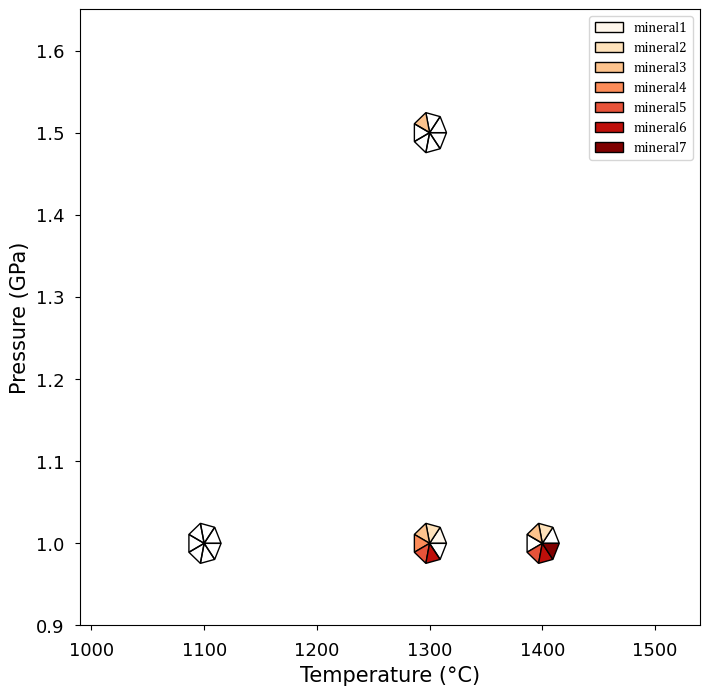

In [2]:
### 1. user defined input
# csv file should be set up so that Temp is in first column, pressure in second column (units don't matter) 
# followed by mineral phases where 0 = mineral isn't present and 1 = mineral is present
filename = 'inputdata.csv'
plotsize = (8,8) #800 x 800 pixels
pixelsize = 80  # defines the number of pixels the polygon occupies - will change as you change axis limits
colourmap = 'OrRd' # can use any colourmap from matplotlib

### 2. load in data from csv file
headers, data = loaddata(filename)

### 3. define temperature and pressure limits either by data file (default) or desired values
maxT = max(data[:,0])
minT = min(data[:,0])
maxP = max(data[:,1])
minP = min(data[:,1])

fig,axs = plt.subplots(1,1,figsize=(plotsize[0],plotsize[1]))
trainglephasediagram(plotsize, pixelsize, axs, data, maxT, minT, maxP, minP,colourmap)

#plot design
plt.rcParams["font.family"] = 'Cambria'
plt.rcParams['hatch.linewidth'] = 3
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.4

font = 15
axs.set_xlabel('Temperature (°C)', fontsize=font)
axs.set_ylabel('Pressure (GPa)', fontsize=font)
axs.tick_params(axis='both', pad=8,labelsize = font-2)

# axis limits
plt.xlim(minT-(minT/10), maxT+(maxT/10))
plt.ylim(minP-(minP/10), maxP+(maxP/10))

plt.legend()
plt.show()